In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import plotly.graph_objects as go
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from datetime import timedelta
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
# %matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.stats import randint
#from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import timedelta
#from scipy.stats import uniform

In [ ]:
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix, r2_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv("Gold_Futures_Data.csv")
# To display the top 5 rows
df

,Date,Price,Open,High,Low,Vol.,Change %
0,4/12/2024,"2,374.10","2,389.40","2,448.80","2,350.60",479.89K,0.06%
1,4/11/2024,"2,372.70","2,351.70","2,395.60","2,343.10",260.42K,1.03%
2,4/10/2024,"2,348.40","2,372.40","2,378.10","2,337.10",353.85K,-0.59%
3,4/9/2024,"2,362.40","2,358.10","2,384.50","2,355.70",279.61K,0.48%
4,4/8/2024,"2,351.00","2,343.60","2,372.50","2,321.70",285.57K,0.24%
...,...,...,...,...,...,...,...
2071,1/21/2016,"1,098.20","1,100.90","1,106.20","1,092.50",178.74K,-0.72%
2072,1/20/2016,"1,106.20","1,087.30","1,109.90","1,087.10",193.28K,1.57%
2073,1/18/2016,"1,089.10","1,089.30","1,094.50","1,082.10",160.11K,-0.15%
2074,1/15/2016,"1,090.70","1,079.20","1,097.50","1,076.00",173.46K,1.59%


In [ ]:
numeric_columns = ['Price', 'Open', 'High', 'Low']
for column in numeric_columns:
    df[column] = df[column].str.replace(',', '').astype(float)

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,4/12/2024,2374.1,2389.4,2448.8,2350.6,479.89K,0.06%
1,4/11/2024,2372.7,2351.7,2395.6,2343.1,260.42K,1.03%
2,4/10/2024,2348.4,2372.4,2378.1,2337.1,353.85K,-0.59%
3,4/9/2024,2362.4,2358.1,2384.5,2355.7,279.61K,0.48%
4,4/8/2024,2351.0,2343.6,2372.5,2321.7,285.57K,0.24%
...,...,...,...,...,...,...,...
2071,1/21/2016,1098.2,1100.9,1106.2,1092.5,178.74K,-0.72%
2072,1/20/2016,1106.2,1087.3,1109.9,1087.1,193.28K,1.57%
2073,1/18/2016,1089.1,1089.3,1094.5,1082.1,160.11K,-0.15%
2074,1/15/2016,1090.7,1079.2,1097.5,1076.0,173.46K,1.59%


In [ ]:
# Convert 'Tanggal' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract temporal features from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df['Vol.'] = df['Vol.'].str.replace('K', '').astype(float) * 1000


In [ ]:
# Convert Change % to numeric
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

In [ ]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
df.tail(5)

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016
2075,2016-01-14,1073.6,1093.6,1095.4,1071.1,174240.0,-1.24,14,1,2016


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Price,float64
Open,float64
High,float64
Low,float64
Vol.,float64
Change %,float64
Day,int32
Month,int32
Year,int32


In [ ]:
df.shape

(2076, 10)

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,2024-04-12,2374.1,2389.4,2448.8,2350.6,479890.0,0.06,12,4,2024
1,2024-04-11,2372.7,2351.7,2395.6,2343.1,260420.0,1.03,11,4,2024
2,2024-04-10,2348.4,2372.4,2378.1,2337.1,353850.0,-0.59,10,4,2024
3,2024-04-09,2362.4,2358.1,2384.5,2355.7,279610.0,0.48,9,4,2024
4,2024-04-08,2351.0,2343.6,2372.5,2321.7,285570.0,0.24,8,4,2024
...,...,...,...,...,...,...,...,...,...,...
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016


# **DARI MARI**

In [ ]:
# Menghitung Moving Average
df['MA_5'] = df['Price'].rolling(window=5).mean()
df['MA_10'] = df['Price'].rolling(window=10).mean()
df['MA_20'] = df['Price'].rolling(window=20).mean()

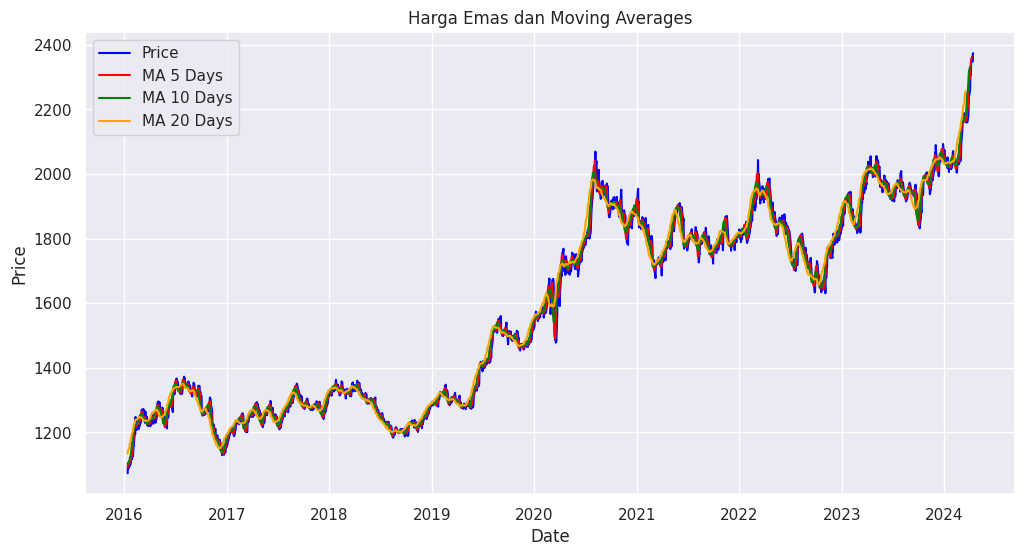

In [ ]:
import matplotlib.pyplot as plt

# Plot harga emas dan Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price', color='blue')
plt.plot(df['Date'], df['MA_5'], label='MA 5 Days', color='red')
plt.plot(df['Date'], df['MA_10'], label='MA 10 Days', color='green')
plt.plot(df['Date'], df['MA_20'], label='MA 20 Days', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Harga Emas dan Moving Averages')
plt.legend()
plt.show()

In [ ]:
# Menghitung VWAP
df['TP'] = (df['High'] + df['Low'] + df['Price']) / 3
df['TPV'] = df['TP'] * df['Vol.']
df['Cum_TPV'] = df['TPV'].cumsum()
df['Cum_Volume'] = df['Vol.'].cumsum()
df['VWAP'] = df['Cum_TPV'] / df['Cum_Volume']

In [ ]:
# Drop kolom tidak diperlukan
df.drop(['TP', 'TPV', 'Cum_TPV', 'Cum_Volume'], axis=1, inplace=True)

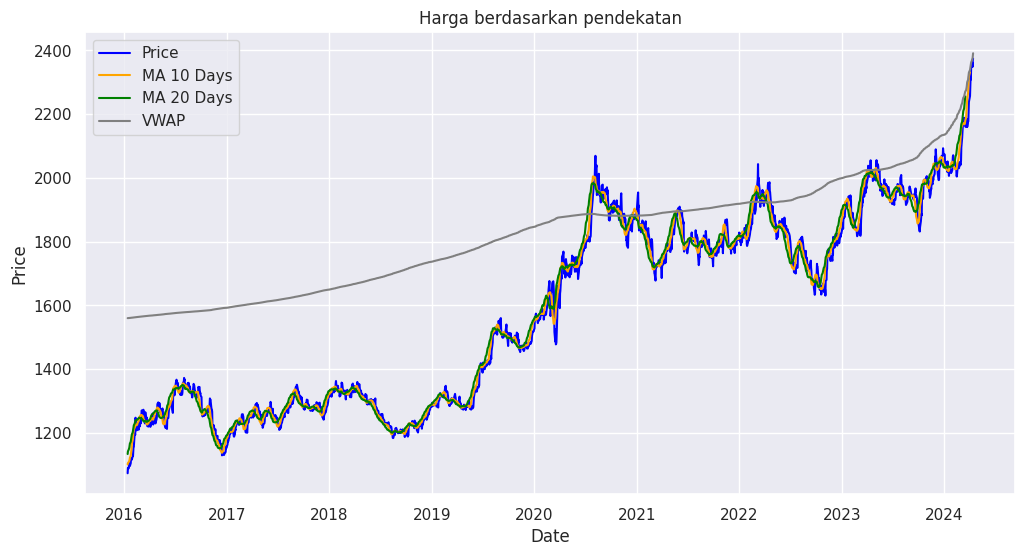

In [ ]:
import matplotlib.pyplot as plt

# Plot harga emas dan Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price', color='blue')
#plt.plot(df['Date'], df['MA_5'], label='MA 5 Days', color='red')
plt.plot(df['Date'], df['MA_10'], label='MA 10 Days', color='orange')
plt.plot(df['Date'], df['MA_20'], label='MA 20 Days', color='green')
plt.plot(df['Date'], df['VWAP'], label='VWAP', color='grey')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Harga berdasarkan pendekatan')
plt.legend()
plt.show()

In [ ]:
print(df.isnull().sum())

Date         0
Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
Day          0
Month        0
Year         0
MA_5         4
MA_10        9
MA_20       19
VWAP         0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()


,0
Date,2057
Price,2057
Open,2057
High,2057
Low,2057
Vol.,2057
Change %,2057
Day,2057
Month,2057
Year,2057


In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year,MA_5,MA_10,MA_20,VWAP
19,2024-03-15,2161.5,2166.2,2176.9,2158.7,187850.0,-0.28,15,3,2024,2166.24,2179.59,2255.615,2271.165509
20,2024-03-14,2167.5,2179.5,2181.3,2157.0,207230.0,-0.61,14,3,2024,2162.80,2172.50,2245.285,2267.239112
21,2024-03-13,2180.8,2163.6,2185.6,2161.3,232270.0,0.68,13,3,2024,2166.76,2169.31,2235.690,2263.481219
22,2024-03-12,2166.1,2189.1,2190.8,2156.2,316250.0,-1.03,12,3,2024,2168.04,2168.20,2226.575,2258.577214
23,2024-03-11,2188.6,2187.6,2195.5,2180.9,242420.0,0.14,11,3,2024,2172.90,2169.42,2217.885,2255.832542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016,1107.16,1116.48,1160.210,1560.848110
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016,1105.24,1112.97,1154.205,1560.667262
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016,1099.02,1109.16,1148.090,1560.513486
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016,1096.10,1105.43,1142.215,1560.346826


In [ ]:
df.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year,MA_5,MA_10,MA_20,VWAP
2066,2016-01-28,1116.1,1126.2,1126.4,1110.2,151220.0,0.03,28,1,2016,1125.80,1153.53,1190.490,1561.646342
2067,2016-01-27,1115.8,1119.9,1128.0,1114.9,168710.0,-0.39,27,1,2016,1120.70,1145.65,1184.340,1561.494286
2068,2016-01-26,1120.2,1108.2,1123.2,1107.2,197690.0,1.35,26,1,2016,1119.30,1137.81,1178.395,1561.315156
2069,2016-01-25,1105.3,1097.8,1109.2,1097.6,176360.0,0.82,25,1,2016,1114.76,1128.55,1172.530,1561.150865
2070,2016-01-22,1096.3,1101.6,1103.5,1094.4,142740.0,-0.17,22,1,2016,1110.74,1122.41,1166.840,1561.016244
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016,1107.16,1116.48,1160.210,1560.848110
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016,1105.24,1112.97,1154.205,1560.667262
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016,1099.02,1109.16,1148.090,1560.513486
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016,1096.10,1105.43,1142.215,1560.346826
2075,2016-01-14,1073.6,1093.6,1095.4,1071.1,174240.0,-1.24,14,1,2016,1091.56,1101.15,1133.925,1560.176689


In [ ]:
# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_By_Week'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['Date'].dt.is_month_end.astype(int)

<ipython-input-24-2734a1bb2efc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-24-2734a1bb2efc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-24-2734a1bb2efc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year,MA_5,MA_10,MA_20,VWAP,Day_By_Week,Quarter,is_month_start,is_month_end
19,2024-03-15,2161.5,2166.2,2176.9,2158.7,187850.0,-0.28,15,3,2024,2166.24,2179.59,2255.615,2271.165509,4,1,0,0
20,2024-03-14,2167.5,2179.5,2181.3,2157.0,207230.0,-0.61,14,3,2024,2162.80,2172.50,2245.285,2267.239112,3,1,0,0
21,2024-03-13,2180.8,2163.6,2185.6,2161.3,232270.0,0.68,13,3,2024,2166.76,2169.31,2235.690,2263.481219,2,1,0,0
22,2024-03-12,2166.1,2189.1,2190.8,2156.2,316250.0,-1.03,12,3,2024,2168.04,2168.20,2226.575,2258.577214,1,1,0,0
23,2024-03-11,2188.6,2187.6,2195.5,2180.9,242420.0,0.14,11,3,2024,2172.90,2169.42,2217.885,2255.832542,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016,1107.16,1116.48,1160.210,1560.848110,3,1,0,0
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016,1105.24,1112.97,1154.205,1560.667262,2,1,0,0
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016,1099.02,1109.16,1148.090,1560.513486,0,1,0,0
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016,1096.10,1105.43,1142.215,1560.346826,4,1,0,0


In [ ]:
# Add lagged features using the 'Price' column
for lag in range(1, 8):
    df[f'price_lag_{lag}'] = df['Price'].shift(lag)
df.dropna(inplace=True)


<ipython-input-26-4f1968e61214>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'price_lag_{lag}'] = df['Price'].shift(lag)
<ipython-input-26-4f1968e61214>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'price_lag_{lag}'] = df['Price'].shift(lag)
<ipython-input-26-4f1968e61214>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

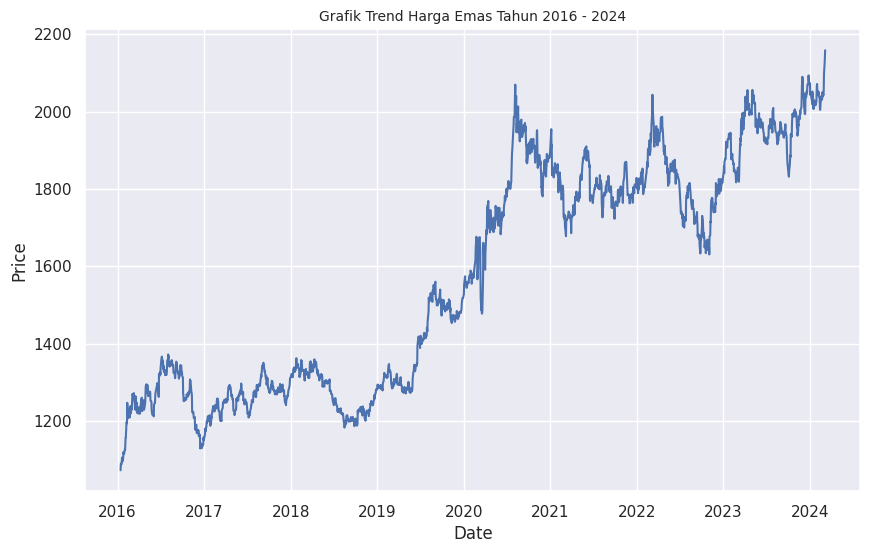

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Price", data=df)
plt.title("Grafik Trend Harga Emas Tahun 2016 - 2024", fontsize=10)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

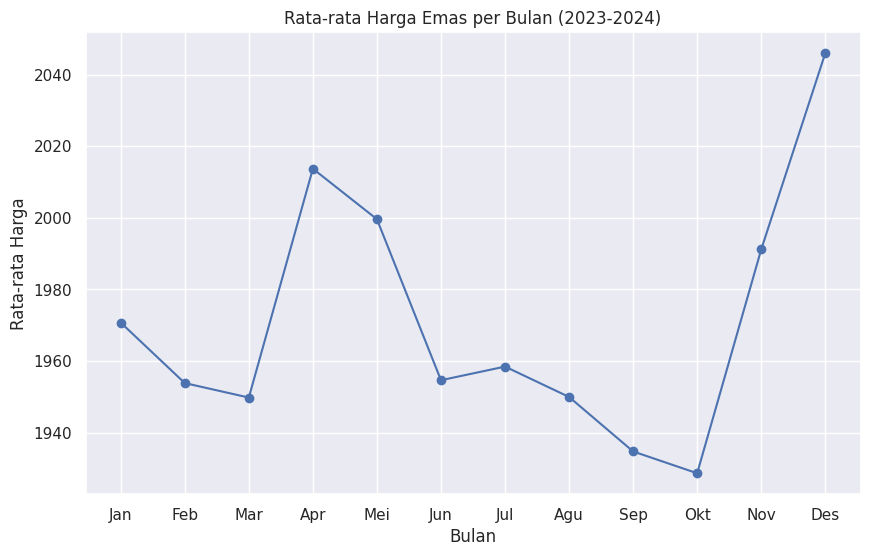

In [ ]:
# Filter data for the years 2023-2024
df_filtered = df[(df['Year'] >= 2023) & (df['Year'] <= 2024)]

# Seasonal Analysis by Month for 2023-2024
monthly_mean_filtered = df_filtered.groupby('Month')['Price'].mean()
plt.figure(figsize=(10, 6))
monthly_mean_filtered.plot(marker='o')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga Emas per Bulan (2023-2024)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()


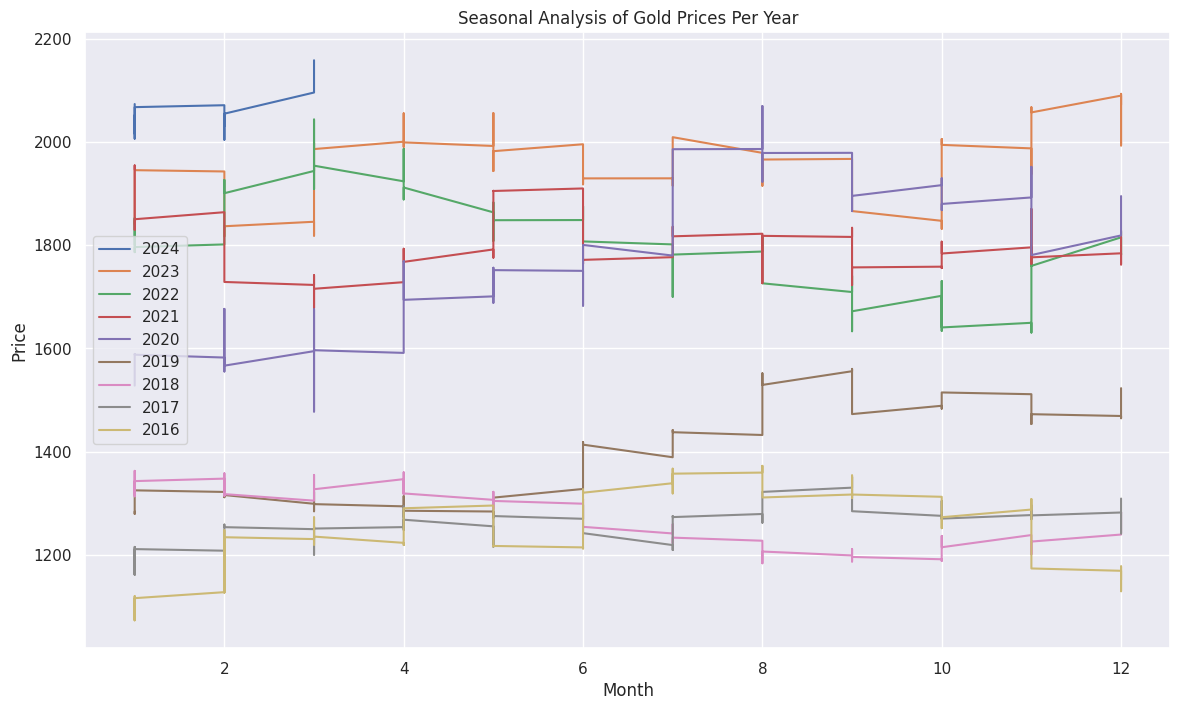

In [ ]:
# Seasonal Analysis per Year
plt.figure(figsize=(14, 8))
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    plt.plot(year_data['Month'], year_data['Price'], label=str(year))
plt.title("Seasonal Analysis of Gold Prices Per Year")
plt.xlabel("Month")
plt.ylabel("Price")
plt.legend()
plt.show()


<ipython-input-30-536b7e21eaed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


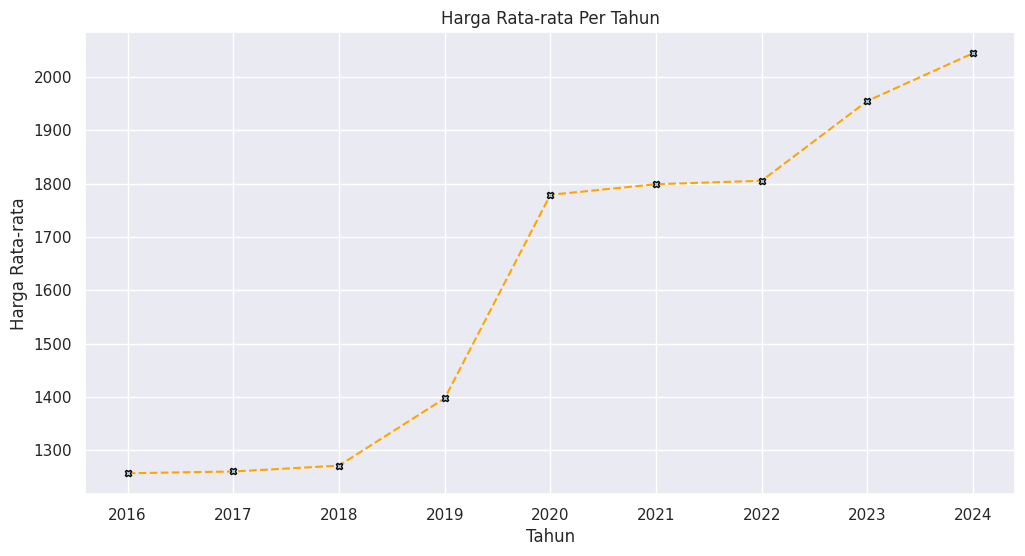

In [ ]:
# Extract year for grouping
df['Year'] = df['Date'].dt.year

# Calculate yearly mean
yearly_mean = df.groupby('Year')['Price'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='X',linestyle='--', markersize=5, c='orange', mfc='lightblue', mec='black' )
plt.xlabel('Tahun')
plt.ylabel('Harga Rata-rata')
plt.title('Harga Rata-rata Per Tahun')
plt.grid(True)
plt.show()

# # prompt: tambahkan rata rata harga setiap tahunnya

# import matplotlib.pyplot as plt
# # Create a new dataframe with average price per year
# yearly_average_prices = df.groupby('Year')['Price'].mean().reset_index()

# # Plot the average price per year with markers
# plt.figure(figsize=(12, 6))
# plt.plot(yearly_average_prices['Year'], yearly_average_prices['Price'], marker='X' ,linestyle='--', markersize=5, c='orange', mfc='lightblue', mec='black')

# # Set labels and title
# plt.xlabel('Year')
# plt.ylabel('Harga Rata-rata')
# plt.title('Harga Rata-rata Pertahun')

# # Show the plot
# plt.show()


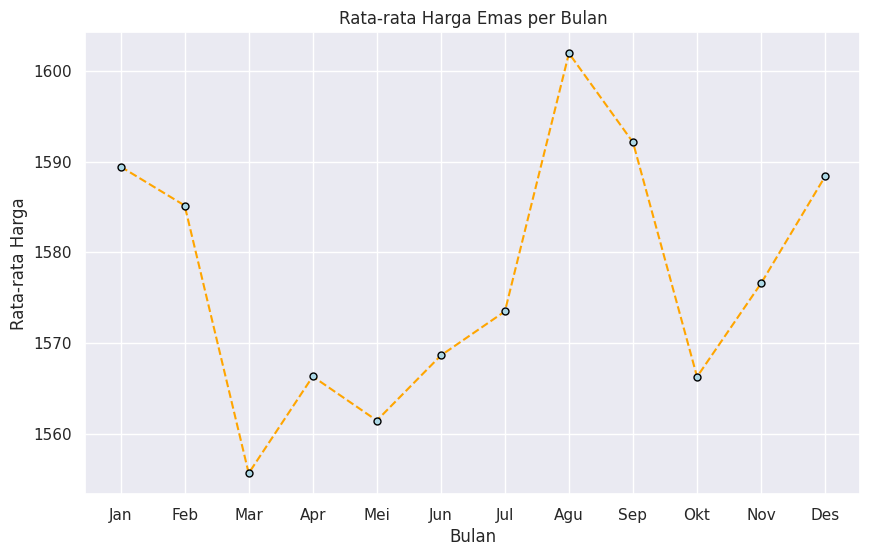

In [ ]:
# Seasonal Analysis by Month
monthly_mean = df.groupby('Month')['Price'].mean()
plt.figure(figsize=(10, 6))
monthly_mean.plot(marker='o' ,linestyle='--', markersize=5, c='orange', mfc='lightblue', mec='black')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga Emas per Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import plotly.graph_objects as go
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.stats import randint
from datetime import timedelta
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix, r2_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#from datetime import timedelta
# %matplotlib inline
sns.set(color_codes=True)
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#from scipy.stats import uniform

df = pd.read_csv("Gold_Futures_Data.csv")
# To display the top 5 rows
# df
numeric_columns = ['Price', 'Open', 'High', 'Low']
for column in numeric_columns:
    df[column] = df[column].str.replace(',', '').astype(float)
# df
# Convert 'Tanggal' to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Extract temporal features from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Vol.'] = df['Vol.'].str.replace('K', '').astype(float) * 1000

# Convert Change % to numeric
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df['MA_5'] = df['Price'].rolling(window=5).mean()
df['MA_10'] = df['Price'].rolling(window=10).mean()
df['MA_20'] = df['Price'].rolling(window=20).mean()

df['TP'] = (df['High'] + df['Low'] + df['Price']) / 3
df['TPV'] = df['TP'] * df['Vol.']
df['Cum_TPV'] = df['TPV'].cumsum()
df['Cum_Volume'] = df['Vol.'].cumsum()
df['VWAP'] = df['Cum_TPV'] / df['Cum_Volume']
# Drop kolom tidak diperlukan
df.drop(['TP', 'TPV', 'Cum_TPV', 'Cum_Volume'], axis=1, inplace=True)
# df
# print(df.isnull().sum())
df = df.dropna()    # Dropping the missing values.
# df.count()

# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_By_Week'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['Date'].dt.is_month_end.astype(int)
# Add lagged features using the 'Price' column
for lag in range(1, 8):
    df[f'price_lag_{lag}'] = df['Price'].shift(lag)
df.dropna(inplace=True)

monthly_mean = df.groupby('Month')['Price'].mean()
print(monthly_mean)


Month
1     1589.448276
2     1585.157225
3     1555.619780
4     1566.298160
5     1561.436842
6     1568.610588
7     1573.476506
8     1601.955556
9     1592.123313
10    1566.262857
11    1576.575301
12    1588.377246
Name: Price, dtype: float64


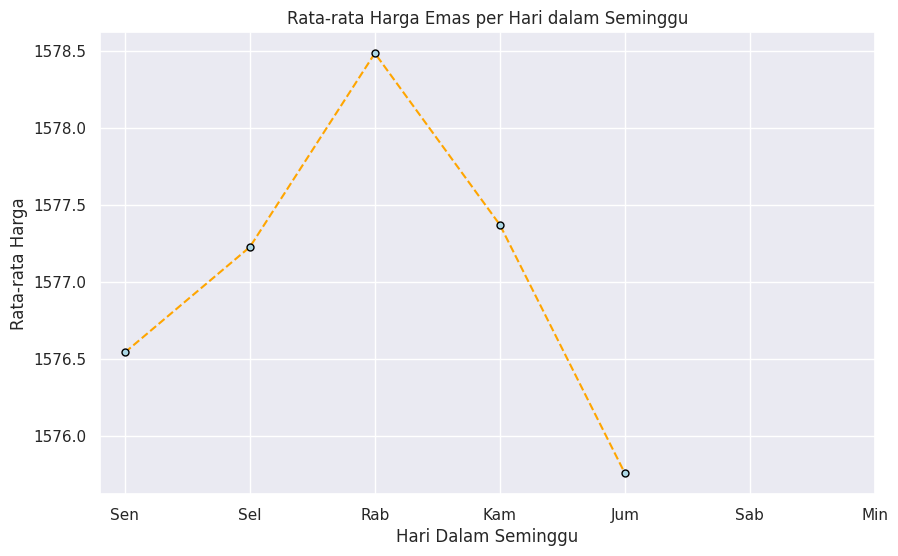

In [ ]:
# Seasonal Analysis by Day of Week
weekday_mean = df.groupby('Day_By_Week')['Price'].mean()
plt.figure(figsize=(10, 6))
weekday_mean.plot(marker='o',linestyle='--', markersize=5, c='orange', mfc='lightblue', mec='black')
plt.xlabel('Hari Dalam Seminggu')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga Emas per Hari dalam Seminggu')
plt.xticks(range(7), ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.grid(True)
plt.show()

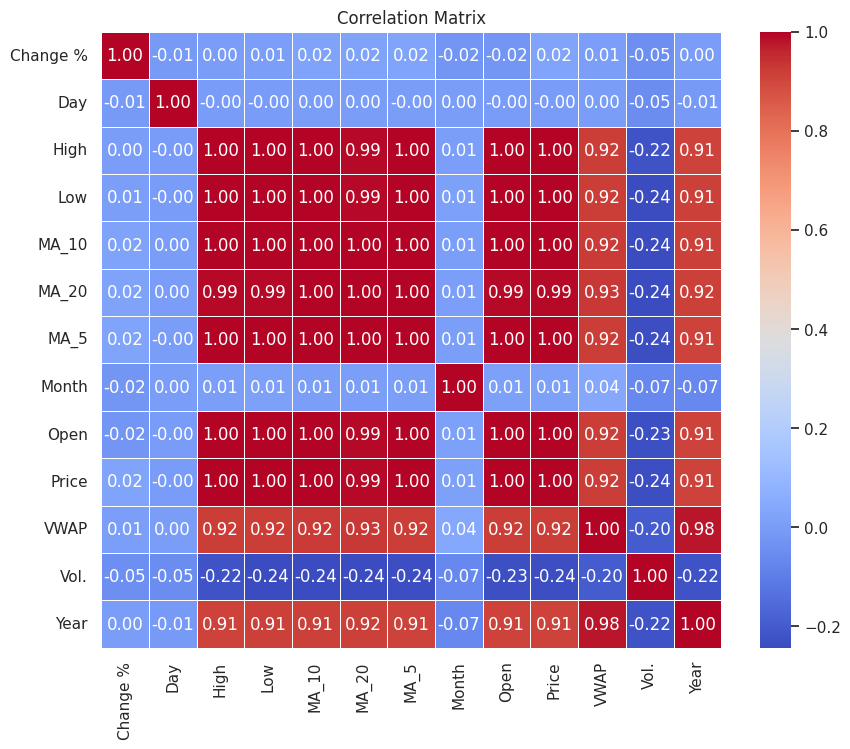

In [ ]:
# Correlation Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cols_to_exclude = ['Day_By_Week', 'Quarter', 'is_month_start', 'is_month_end'] + [f'price_lag_{lag}' for lag in range(1, 8)]
# relevant_cols = df.columns.difference(cols_to_exclude + ['Date'])
# corr_matrix = df[relevant_cols].corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(df[relevant_cols].corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()
cols_to_exclude = ['Day_By_Week', 'Quarter', 'is_month_start', 'is_month_end'] + [f'price_lag_{lag}' for lag in range(1, 8)]
relevant_cols = df.columns.difference(cols_to_exclude + ['Date'])
plt.figure(figsize=(10, 8))
sns.heatmap(df[relevant_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2050 entries, 26 to 2075
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2050 non-null   datetime64[ns]
 1   Price           2050 non-null   float64       
 2   Open            2050 non-null   float64       
 3   High            2050 non-null   float64       
 4   Low             2050 non-null   float64       
 5   Vol.            2050 non-null   float64       
 6   Change %        2050 non-null   float64       
 7   Day             2050 non-null   int32         
 8   Month           2050 non-null   int32         
 9   Year            2050 non-null   int32         
 10  MA_5            2050 non-null   float64       
 11  MA_10           2050 non-null   float64       
 12  MA_20           2050 non-null   float64       
 13  VWAP            2050 non-null   float64       
 14  Day_By_Week     2050 non-null   int32         
 15  Quarter 

In [ ]:
# Data Preparation
X = df[['Month', 'Year', 'Open','Day_By_Week', 'Quarter', 'is_month_start', 'is_month_end', 'MA_5', 'MA_10',
        'MA_20', 'VWAP' , 'Vol.' , 'High', 'Low'] + [f'price_lag_{lag}' for lag in range(1, 8)]]
y = df['Price']

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year,...,Quarter,is_month_start,is_month_end,price_lag_1,price_lag_2,price_lag_3,price_lag_4,price_lag_5,price_lag_6,price_lag_7
26,2024-03-06,2158.2,2136.4,2160.7,2131.9,319760.0,0.76,6,3,2024,...,1,0,0,2165.2,2185.5,2188.6,2166.1,2180.8,2167.5,2161.5
27,2024-03-05,2141.9,2123.3,2150.5,2118.5,283150.0,0.73,5,3,2024,...,1,0,0,2158.2,2165.2,2185.5,2188.6,2166.1,2180.8,2167.5
28,2024-03-04,2126.3,2091.6,2128.4,2088.1,328250.0,1.46,4,3,2024,...,1,0,0,2141.9,2158.2,2165.2,2185.5,2188.6,2166.1,2180.8
29,2024-03-01,2095.7,2052.8,2097.1,2047.0,330590.0,2.00,1,3,2024,...,1,1,0,2126.3,2141.9,2158.2,2165.2,2185.5,2188.6,2166.1
30,2024-02-29,2054.7,2043.8,2059.4,2036.0,227070.0,0.59,29,2,2024,...,1,0,1,2095.7,2126.3,2141.9,2158.2,2165.2,2185.5,2188.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016,...,1,0,0,1096.3,1105.3,1120.2,1115.8,1116.1,1116.4,1128.0
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016,...,1,0,0,1098.2,1096.3,1105.3,1120.2,1115.8,1116.1,1116.4
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016,...,1,0,0,1106.2,1098.2,1096.3,1105.3,1120.2,1115.8,1116.1
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016,...,1,0,0,1089.1,1106.2,1098.2,1096.3,1105.3,1120.2,1115.8


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score


In [ ]:
# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [0.1, 'sqrt', 'log2']
}

In [ ]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)


In [ ]:
# Perform hyperparameter search using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [0.1, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42)

In [ ]:
# Get the best model
best_gbr = random_search.best_estimator_

In [ ]:
# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best R^2 score: ", random_search.best_score_)

Best parameters found:  {'subsample': 0.9, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.05}
Best R^2 score:  0.9991280386599062


In [ ]:
# Model evaluation
y_pred_train = best_gbr.predict(X_train_scaled)
y_pred_test = best_gbr.predict(X_test_scaled)

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
print("Hasil Evaluasi Model Gradient Boosting Regressor:")
print("R2 Score Train:", r2_train)
print("R2 Score Test:", r2_test)


Hasil Evaluasi Model Gradient Boosting Regressor:
R2 Score Train: 0.9999665457470799
R2 Score Test: 0.9990818040319872


In [ ]:
# Cross-Validation Score
cv_score = cross_val_score(best_gbr, X_train_scaled, y_train, cv=5)
print("Cross-Validation Score:", np.mean(cv_score))

Cross-Validation Score: 0.9991280386599062


In [ ]:
# prompt: calculate MSE,RMSE, MAE, MAPE  and R score from best parameter

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ... (Your preceding code) ...

# Model evaluation
y_pred_train = best_gbr.predict(X_train_scaled)
y_pred_test = best_gbr.predict(X_test_scaled)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
r2_test = r2_score(y_test, y_pred_test)

# Print results
print("Hasil Evaluasi Model Gradient Boosting Regressor:")
print("Train Set:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("MAPE:", mape_train)
print("R2 Score:", r2_train)

print("\nTest Set:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("MAPE:", mape_test)
print("R2 Score:", r2_test)


Hasil Evaluasi Model Gradient Boosting Regressor:
Train Set:
MSE: 2.8743830963541637
RMSE: 1.6954005710610587
MAE: 1.341726943714667
MAPE: 0.08697901681115752
R2 Score: 0.9999665457470799

Test Set:
MSE: 79.38696069797064
RMSE: 8.90993606587447
MAE: 6.494971896326933
MAPE: 0.40715338007724855
R2 Score: 0.9990818040319872


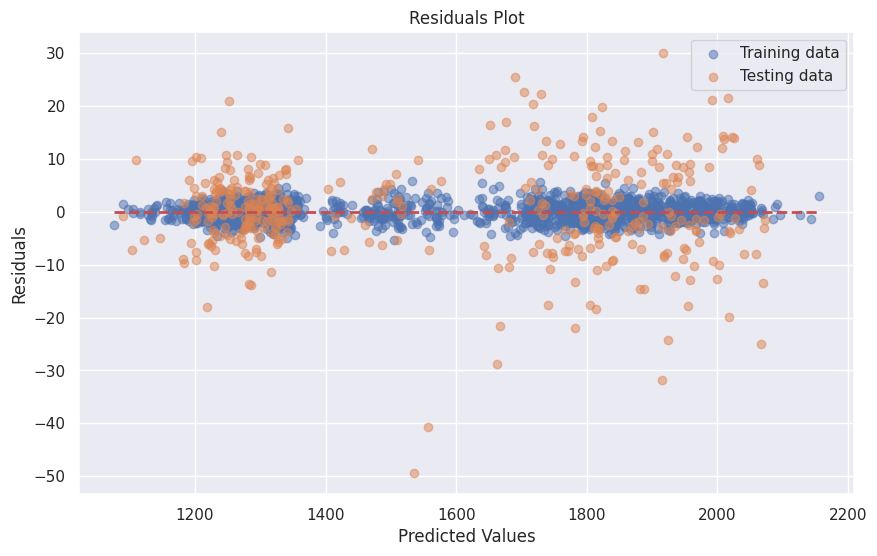

In [ ]:
# # Learning curve with the best model
# from sklearn.model_selection import learning_curve
# train_sizes, train_scores, test_scores = learning_curve(
#     estimator=best_gbr,
#     X=X_train_scaled,
#     y=y_train,
#     train_sizes=np.linspace(0.1, 1.0, 5),
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_scores_mean, label='Training error')
# plt.plot(train_sizes, test_scores_mean, label='Validation error')
# plt.title('Learning Curves')
# plt.xlabel('Training Examples')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.show()

# Visualize Residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, label='Training data', alpha=0.5)
plt.scatter(y_pred_test, residuals_test, label='Testing data', alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.hlines(y=0, xmin=min(y_pred_train.min(), y_pred_test.min()), xmax=max(y_pred_train.max(), y_pred_test.max()), colors='r', linestyles='--', lw=2)
plt.show()

# # Feature Importance
# plt.figure(figsize=(10, 6))
# sns.barplot(X=best_gbr.feature_importances_, y=X.columns)
# plt.title('Feature Importance')
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definisikan k-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi menggunakan cross-validation
mae_scores = cross_val_score(best_gbr, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(best_gbr, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
mape_scores = cross_val_score(best_gbr, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
r2_scores = cross_val_score(best_gbr, X_train_scaled, y_train, cv=kfold, scoring='r2')

print("Cross-Validation Results:")
print(f"Mean MAE: {-np.mean(mae_scores)}")
print(f"Mean MSE: {-np.mean(mse_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


Cross-Validation Results:
Mean MAE: 6.291868899171957
Mean MSE: 77.2228027405868
Mean RMSE: 8.784896620674967
Mean R^2: 0.9990987472288312


In [ ]:
# Menghitung persentase kesalahan
average_price = df['Price'].mean()
mae_percentage_error = (mean_mae / average_price) * 100
mse_percentage_error = (mean_mse / average_price) * 100
rmse_percentage_error = (mean_rmse / average_price) * 100

print("Cross-Validation Results:")
print(f"Mean MAE: {mean_mae}")
print(f"Mean MSE: {mean_mse}")
print(f"Mean RMSE: {mean_rmse}")

print("\nPercentage Difference:")
print(f"MAE Percentage Error: {mae_percentage_error:.2f}%")
print(f"MSE Percentage Error: {mse_percentage_error:.2f}%")
print(f"RMSE Percentage Error: {rmse_percentage_error:.2f}%")

NameError: name 'mean_mae' is not defined

In [ ]:
# Hitung rata-rata harga
mean_price = np.mean(y_train)

#calculate averr
mean_mae = -np.mean(mae_scores)
mean_mse = -np.mean(mse_scores)
mean_rmse = np.mean(np.sqrt(-mse_scores))

print("Cross-Validation Results:")
print(f"Mean MAE: {mean_mae}")
#print(f"MAE Relative Error: {mae_relative_error:.2f}%")
print(f"Mean MSE: {mean_mse}")
#print(f"MSE Relative Error: {mse_relative_error:.2f}%")
print(f"Mean RMSE: {mean_rmse}")
#print(f"RMSE Relative Error: {rmse_relative_error:.2f}%")
#print(f"Mean R^2: {np.mean(r2_scores)}")

#calculate percentage
mae_percentage_diff = mean_mae / mean_price * 100
mse_percentage_diff = mean_mse / mean_price * 100
rmse_percentage_diff = mean_rmse / mean_price * 100

print("\nPercentage Difference:")
print(f"MAE Percentage Difference: {mae_percentage_diff:.2f}%")
print(f"MSE Percentage Difference: {mse_percentage_diff:.2f}%")
print(f"RMSE Percentage Difference: {rmse_percentage_diff:.2f}%")

Cross-Validation Results:
Mean MAE: 6.291868899171957
Mean MSE: 77.2228027405868
Mean RMSE: 8.784896620674967

Percentage Difference:
MAE Percentage Difference: 0.40%
MSE Percentage Difference: 4.89%
RMSE Percentage Difference: 0.56%


In [ ]:
# Combine test dates with predictions
test_dates = df.loc[y_test.index, 'Date']
pred_df = pd.DataFrame({'Date': test_dates, 'Predicted': y_pred_test, 'Actual': y_test})

# Sort the dataframe by Date
pred_df = pred_df.sort_values(by='Date')
# Display DataFrame with future predictions for the next 20 days
#future_comparison_df = future_data[['Date', 'Predicted_High']]
print(pred_df.tail(20))

          Date    Predicted  Actual
125 2023-10-12  1914.722615  1883.0
104 2023-11-10  1955.588850  1937.7
102 2023-11-14  1957.425726  1966.5
99  2023-11-17  1994.068583  1984.7
96  2023-11-22  2002.851850  1992.8
95  2023-11-23  2003.333652  2003.0
93  2023-11-28  2026.026962  2040.0
91  2023-11-30  2070.585601  2057.2
89  2023-12-04  2067.240909  2042.2
85  2023-12-08  2018.111658  2014.5
82  2023-12-13  2017.191019  1997.3
75  2023-12-22  2072.125887  2069.1
71  2023-12-29  2073.368433  2071.8
70  2024-01-02  2064.565296  2073.4
65  2024-01-09  2040.967161  2033.0
58  2024-01-19  2032.597809  2029.3
56  2024-01-23  2026.949284  2025.8
55  2024-01-24  2020.079487  2016.0
51  2024-01-30  2058.912675  2050.9
49  2024-02-01  2061.174553  2071.1


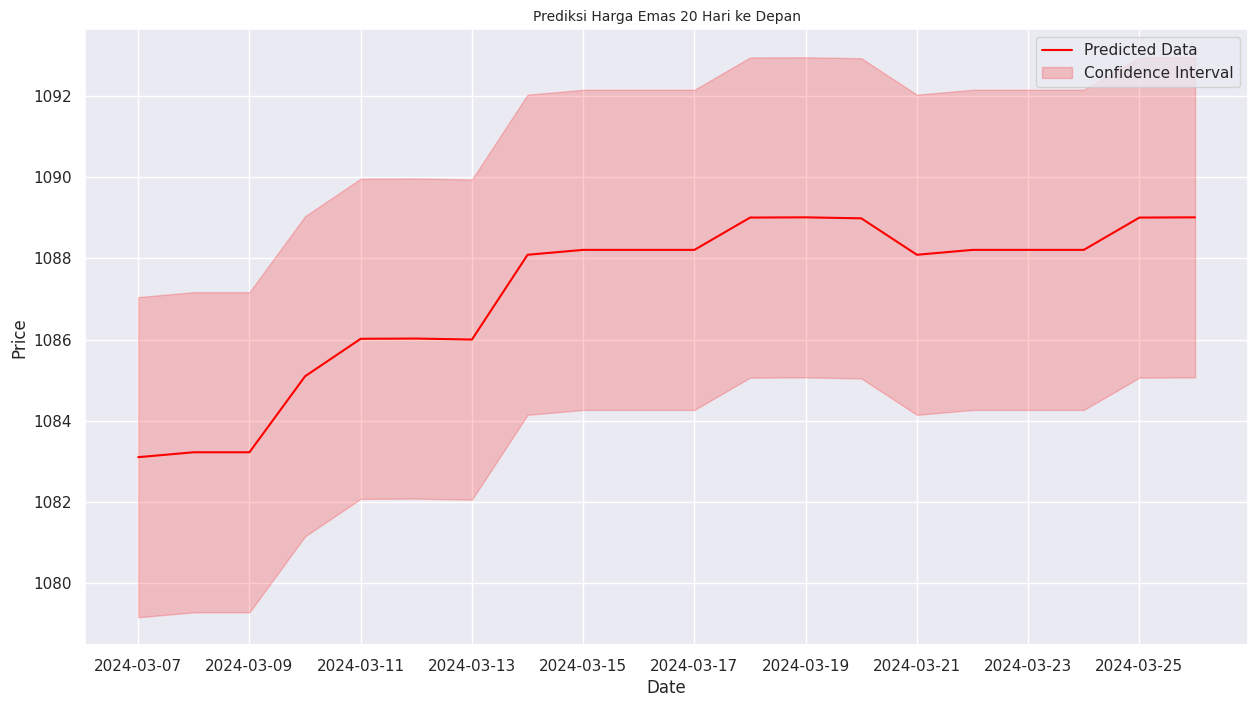

        Date  Predicted_High
0 2024-03-07     1083.103743
1 2024-03-08     1083.224493
2 2024-03-09     1083.224493
3 2024-03-10     1085.096294
4 2024-03-11     1086.019116


In [ ]:
# Predicting future prices for the next 20 days
last_known_data = df.iloc[-1].copy()  # Copy the last row of the historical data
future_dates = pd.date_range(start=df['Date'].max() + timedelta(days=1), periods=20)  # Generate dates for the next 20 days
predictions = []

# Loop through each future date and make a prediction
for future_date in future_dates:
    last_known_data['Date'] = future_date
    last_known_data['Month'] = future_date.month
    last_known_data['Year'] = future_date.year
    last_known_data['Day_By_Week'] = future_date.dayofweek
    last_known_data['Quarter'] = future_date.quarter
    last_known_data['is_month_start'] = future_date.is_month_start
    last_known_data['is_month_end'] = future_date.is_month_end

    # Generate lagged values for the prediction
    lagged_values = []
    for lag in range(1, 8):
        lagged_value = df['Price'].shift(lag).iloc[-1] if len(predictions) < lag else predictions[-lag]
        lagged_values.append(lagged_value)
    for i, lag in enumerate(lagged_values):
        last_known_data[f'price_lag_{i + 1}'] = lag

    # Update the moving averages and VWAP based on historical data
    last_known_data['MA_5'] = df['Price'].rolling(window=5).mean().iloc[-1]
    last_known_data['MA_10'] = df['Price'].rolling(window=10).mean().iloc[-1]
    last_known_data['MA_20'] = df['Price'].rolling(window=20).mean().iloc[-1]
    last_known_data['VWAP'] = df['VWAP'].iloc[-1]

    # Extract the features and scale them
    features = last_known_data[['Month', 'Year', 'Open', 'Day_By_Week', 'Quarter', 'is_month_start', 'is_month_end', 'MA_5', 'MA_10', 'MA_20', 'VWAP', 'Vol.', 'High', 'Low'] + [f'price_lag_{lag}' for lag in range(1, 8)]]
    features_df = pd.DataFrame([features])
    scaled_features = scaler.transform(features_df)

    # Make the prediction
    future_prediction = best_gbr.predict(scaled_features)[0]
    predictions.append(future_prediction)

# Create a DataFrame for the future predictions
future_data = pd.DataFrame({
    'Date': future_dates,
    'Predicted_High': predictions
})

# Visualize future predictions with confidence intervals
std_dev = np.std(predictions)
confidence_interval = 1.96 * std_dev
upper_bound = np.array(predictions) + confidence_interval
lower_bound = np.array(predictions) - confidence_interval

plt.figure(figsize=(15, 8))
plt.plot(future_data['Date'], future_data['Predicted_High'], label='Predicted Data', color='red')
plt.fill_between(future_data['Date'], lower_bound, upper_bound, color='red', alpha=0.2, label='Confidence Interval')
plt.title('Prediksi Harga Emas 20 Hari ke Depan', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display DataFrame with future predictions for the next 20 days
future_comparison_df = future_data[['Date', 'Predicted_High']]
print(future_comparison_df.head())


In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Day,Month,Year,...,Quarter,is_month_start,is_month_end,price_lag_1,price_lag_2,price_lag_3,price_lag_4,price_lag_5,price_lag_6,price_lag_7
26,2024-03-06,2158.2,2136.4,2160.7,2131.9,319760.0,0.76,6,3,2024,...,1,0,0,2165.2,2185.5,2188.6,2166.1,2180.8,2167.5,2161.5
27,2024-03-05,2141.9,2123.3,2150.5,2118.5,283150.0,0.73,5,3,2024,...,1,0,0,2158.2,2165.2,2185.5,2188.6,2166.1,2180.8,2167.5
28,2024-03-04,2126.3,2091.6,2128.4,2088.1,328250.0,1.46,4,3,2024,...,1,0,0,2141.9,2158.2,2165.2,2185.5,2188.6,2166.1,2180.8
29,2024-03-01,2095.7,2052.8,2097.1,2047.0,330590.0,2.00,1,3,2024,...,1,1,0,2126.3,2141.9,2158.2,2165.2,2185.5,2188.6,2166.1
30,2024-02-29,2054.7,2043.8,2059.4,2036.0,227070.0,0.59,29,2,2024,...,1,0,1,2095.7,2126.3,2141.9,2158.2,2165.2,2185.5,2188.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,2016-01-21,1098.2,1100.9,1106.2,1092.5,178740.0,-0.72,21,1,2016,...,1,0,0,1096.3,1105.3,1120.2,1115.8,1116.1,1116.4,1128.0
2072,2016-01-20,1106.2,1087.3,1109.9,1087.1,193280.0,1.57,20,1,2016,...,1,0,0,1098.2,1096.3,1105.3,1120.2,1115.8,1116.1,1116.4
2073,2016-01-18,1089.1,1089.3,1094.5,1082.1,160110.0,-0.15,18,1,2016,...,1,0,0,1106.2,1098.2,1096.3,1105.3,1120.2,1115.8,1116.1
2074,2016-01-15,1090.7,1079.2,1097.5,1076.0,173460.0,1.59,15,1,2016,...,1,0,0,1089.1,1106.2,1098.2,1096.3,1105.3,1120.2,1115.8


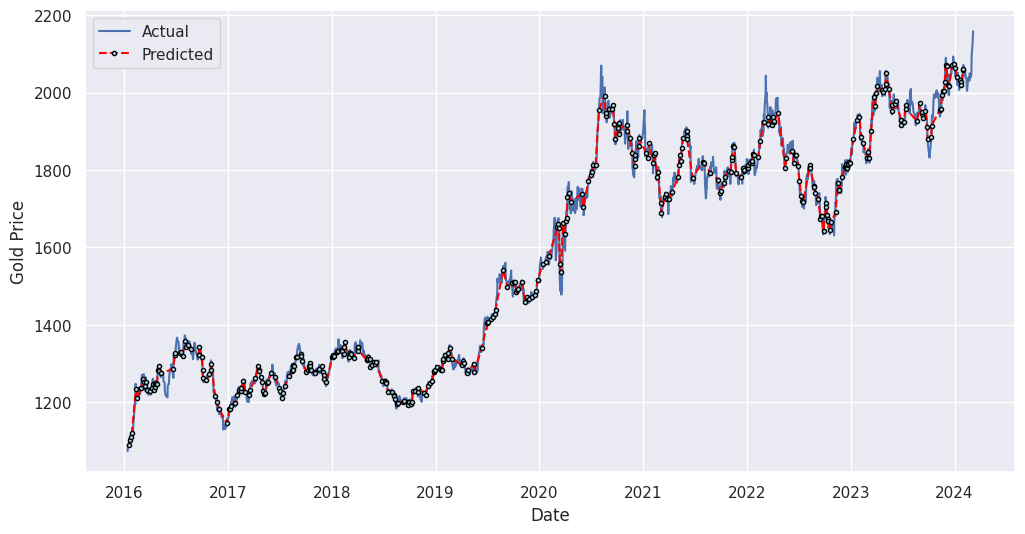

In [ ]:
 # Combine test dates with predictions
test_dates = df.loc[y_test.index, 'Date']
pred_df = pd.DataFrame({'Date': test_dates, 'Predicted': y_pred_test})

# Sort the dataframe by Date
pred_df = pred_df.sort_values(by='Date')

# Plot the actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Actual')  # Plot seluruh data aktual
plt.plot(pred_df['Date'], pred_df['Predicted'], label='Predicted', color='red', linestyle='--', marker='o', markersize=3, mfc='lightblue', mec='black')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
#Visualisasi By Candle Stick
import plotly.graph_objs as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Price'])])

# Add titles
fig.update_layout(title='Candlestick Chart of Gold Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


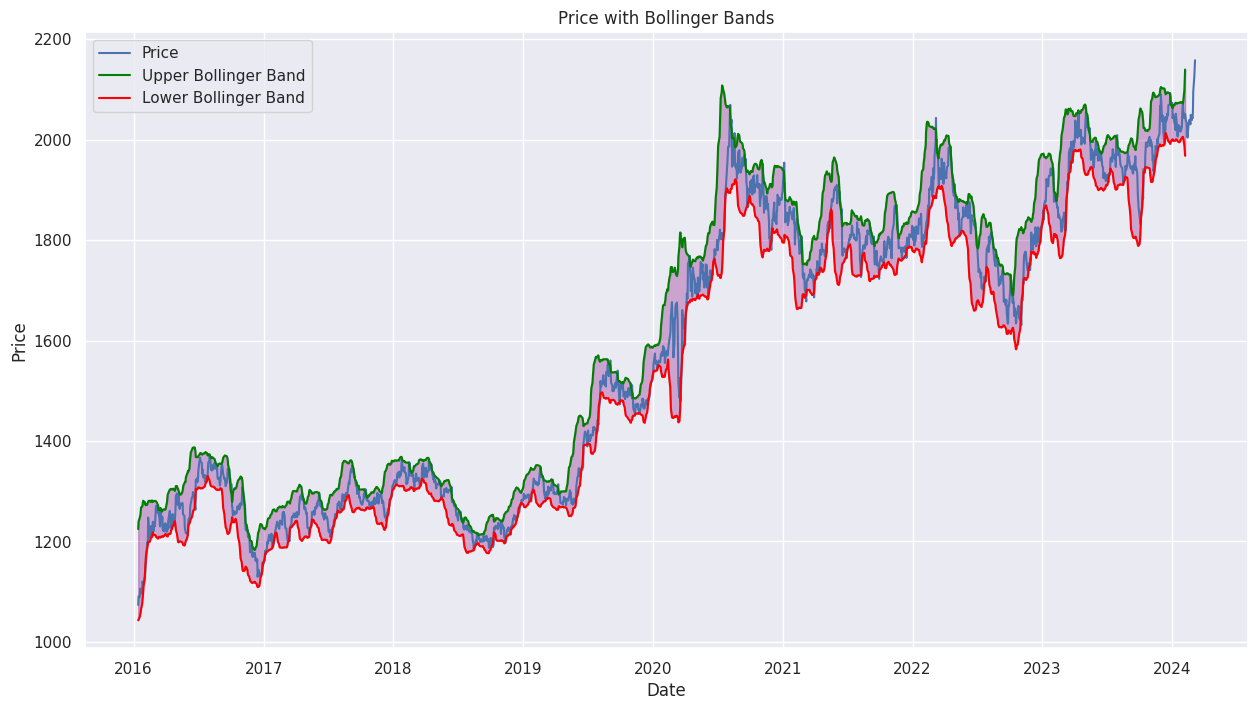

In [ ]:
#Bollingers bands
import matplotlib.pyplot as plt

# Calculate Bollinger Bands
df['MA20'] = df['Price'].rolling(window=20).mean()
df['STD20'] = df['Price'].rolling(window=20).std()
df['Upper Band'] = df['MA20'] + (df['STD20'] * 2)
df['Lower Band'] = df['MA20'] - (df['STD20'] * 2)

plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Price'], label='Price')
# plt.plot(df['Date'], df['MA20'], label='20-Day MA', color='orange')
plt.plot(df['Date'], df['Upper Band'], label='Upper Bollinger Band', color='green')
plt.plot(df['Date'], df['Lower Band'], label='Lower Bollinger Band', color='red')
plt.fill_between(df['Date'], df['Upper Band'], df['Lower Band'], color='purple', alpha=0.3)
plt.title('Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


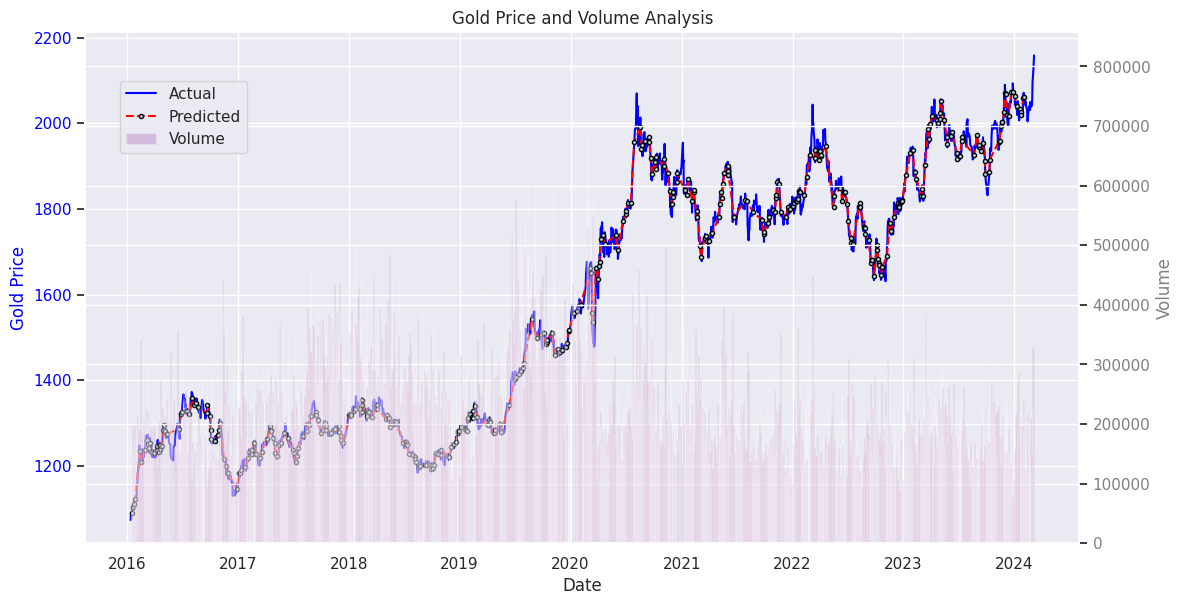

In [ ]:
# Combine test dates with predictions
test_dates = df.loc[y_test.index, 'Date']
pred_df = pd.DataFrame({'Date': test_dates, 'Predicted': y_pred_test})

# Sort the dataframe by Date
pred_df = pred_df.sort_values(by='Date')

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the actual data and predictions on the primary y-axis
ax1.plot(df['Date'], df['Price'], label='Actual', linestyle='-', color='blue')
ax1.plot(pred_df['Date'], pred_df['Predicted'], label='Predicted', color='red', linestyle='--', marker='o', markersize=3, mfc='lightblue', mec='black')

# Set the labels for the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis to plot the Volume
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Vol.'], width=1, alpha=0.2, color='purple', label='Volume')

# Set the labels for the secondary y-axis
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Add legends
fig.tight_layout()  # To ensure no labels are cut off
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Gold Price and Volume Analysis')
plt.show()


In [ ]:
pip install plotly

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Assuming df, y_test, y_pred_test, and future_data are already defined

# Prepare the test data predictions
test_dates = df.loc[y_test.index, 'Date']
pred_df = pd.DataFrame({'Date': test_dates, 'Predicted': y_pred_test})

# Sort the dataframe by Date
pred_df = pred_df.sort_values(by='Date')

# Create a date range for future predictions (1 year ahead)
future_predictions = pd.date_range(start=df['Date'].max(), periods=365, freq='D')

# Assuming lower_bound and upper_bound are the confidence intervals
# Create sample lower and upper bound data for the demonstration
# Replace these with your actual lower and upper bounds
lower_bound = df['Price'] - 10
upper_bound = df['Price'] + 10

# Create traces for the plot
trace_historical = go.Scatter(
    x=df['Date'],
    y=df['Price'],
    mode='lines',
    name='Historical Data',
    line=dict(color='blue')
)

trace_predicted = go.Scatter(
    x=pred_df['Date'],
    y=pred_df['Predicted'],
    mode='lines+markers',
    name='Predicted Test Data',
    line=dict(color='red', dash='dash'),
    marker=dict(color='red', size=5, symbol='circle')
)

trace_future_predicted = go.Scatter(
    x=df['Date'],
    y=df['Price'],
    mode='lines',
    name='Predicted Future Data',
    line=dict(color='red')
)

trace_confidence_interval = go.Scatter(
    x=pd.concat([df['Date'], df['Date'][::-1]]),
    y=pd.concat([upper_bound, lower_bound[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 165, 0, 0.2)',
    line=dict(color='rgba(255, 165, 0, 0)'),
    name='Confidence Interval'
)

# Create the figure
fig = go.Figure()

fig.add_trace(trace_historical)
fig.add_trace(trace_predicted)
# fig.add_trace(trace_future_predicted)
# fig.add_trace(trace_confidence_interval)

# Update the layout
fig.update_layout(
    title='Prediksi Harga Emas 1 Tahun ke Depan',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend',
    template='plotly_white'
)

# Show the plot
fig.show()
#Load dataframe
# Create a DataFrame for actual vs predicted prices
comparison_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test,
    'Predicted': y_pred_test
})

# Sort the dataframe by Date
comparison_df = comparison_df.sort_values(by='Date')
print(comparison_df.tail(20))


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



          Date  Actual    Predicted
125 2023-10-12  1883.0  1914.722615
104 2023-11-10  1937.7  1955.588850
102 2023-11-14  1966.5  1957.425726
99  2023-11-17  1984.7  1994.068583
96  2023-11-22  1992.8  2002.851850
95  2023-11-23  2003.0  2003.333652
93  2023-11-28  2040.0  2026.026962
91  2023-11-30  2057.2  2070.585601
89  2023-12-04  2042.2  2067.240909
85  2023-12-08  2014.5  2018.111658
82  2023-12-13  1997.3  2017.191019
75  2023-12-22  2069.1  2072.125887
71  2023-12-29  2071.8  2073.368433
70  2024-01-02  2073.4  2064.565296
65  2024-01-09  2033.0  2040.967161
58  2024-01-19  2029.3  2032.597809
56  2024-01-23  2025.8  2026.949284
55  2024-01-24  2016.0  2020.079487
51  2024-01-30  2050.9  2058.912675
49  2024-02-01  2071.1  2061.174553


In [ ]:
import pandas as pd

import pandas as pd

# DataFrame with actual vs predicted prices
comparison_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test,
    'Predicted': y_pred_test
})

# Calculate absolute difference and percentage difference
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
comparison_df['% Difference'] = (comparison_df['Difference'] / comparison_df['Actual']) * 100

# Sort the dataframe by Date
comparison_df = comparison_df.sort_values(by='Date')

# Formatting the columns
comparison_df['Date'] = comparison_df['Date'].dt.strftime('%Y-%m-%d')
comparison_df['Actual'] = comparison_df['Actual'].map('{:.1f}'.format)
comparison_df['Predicted'] = comparison_df['Predicted'].map('{:.6f}'.format)
comparison_df['Difference'] = comparison_df['Difference'].map('{:.2f}'.format)
comparison_df['% Difference'] = comparison_df['% Difference'].map('{:.2f}%'.format)

# Display the last 20 rows
comparison_df.tail(20)


,Date,Actual,Predicted,Difference,% Difference
125,2023-10-12,1883.0,1914.722615,-31.72,-1.68%
104,2023-11-10,1937.7,1955.588850,-17.89,-0.92%
102,2023-11-14,1966.5,1957.425726,9.07,0.46%
99,2023-11-17,1984.7,1994.068583,-9.37,-0.47%
96,2023-11-22,1992.8,2002.851850,-10.05,-0.50%
95,2023-11-23,2003.0,2003.333652,-0.33,-0.02%
93,2023-11-28,2040.0,2026.026962,13.97,0.68%
91,2023-11-30,2057.2,2070.585601,-13.39,-0.65%
89,2023-12-04,2042.2,2067.240909,-25.04,-1.23%
85,2023-12-08,2014.5,2018.111658,-3.61,-0.18%


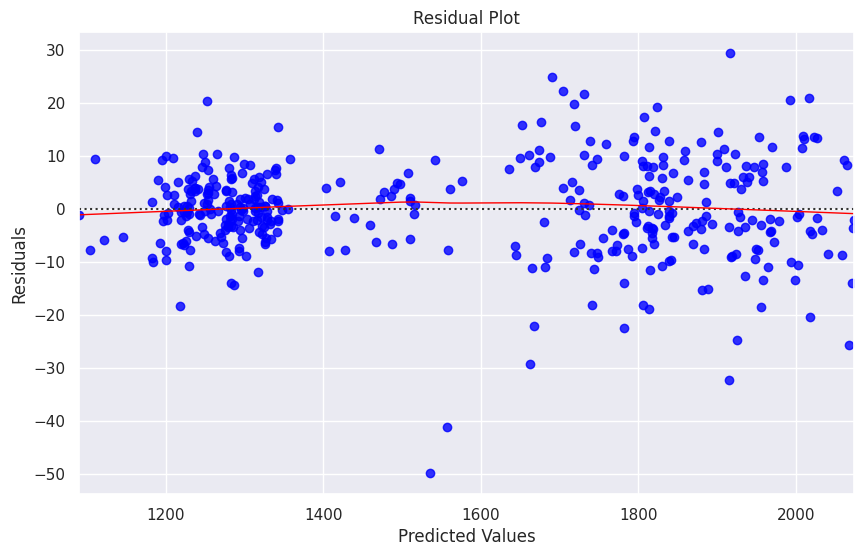

In [ ]:
# Plot residual
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.residplot(x = y_pred_test, y=residuals, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

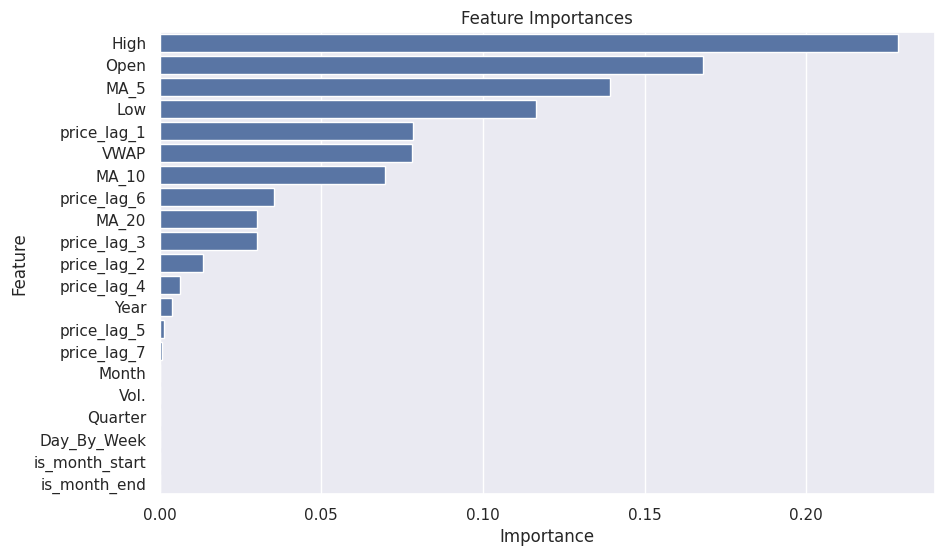

In [ ]:
import pandas as pd

# Get feature importances
feature_importances = best_gbr.feature_importances_
features = X.columns

# Create a DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importances')
plt.show()


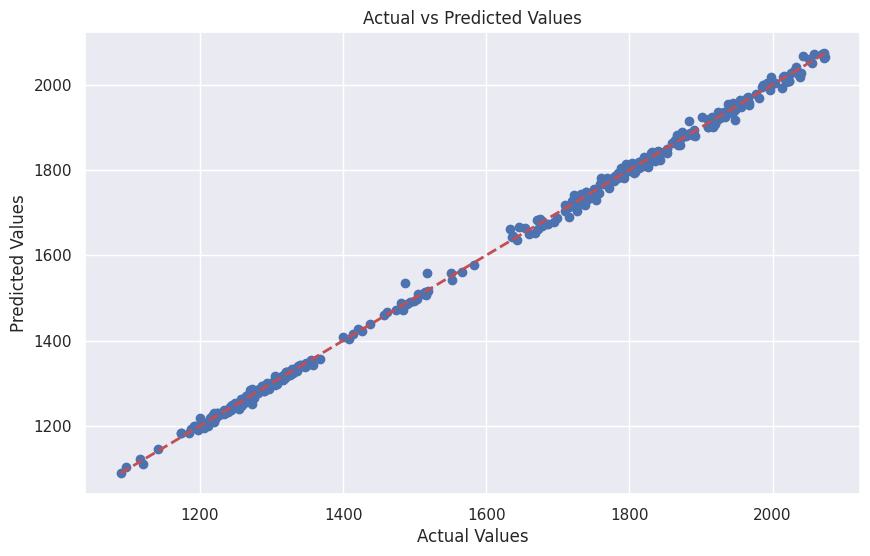

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


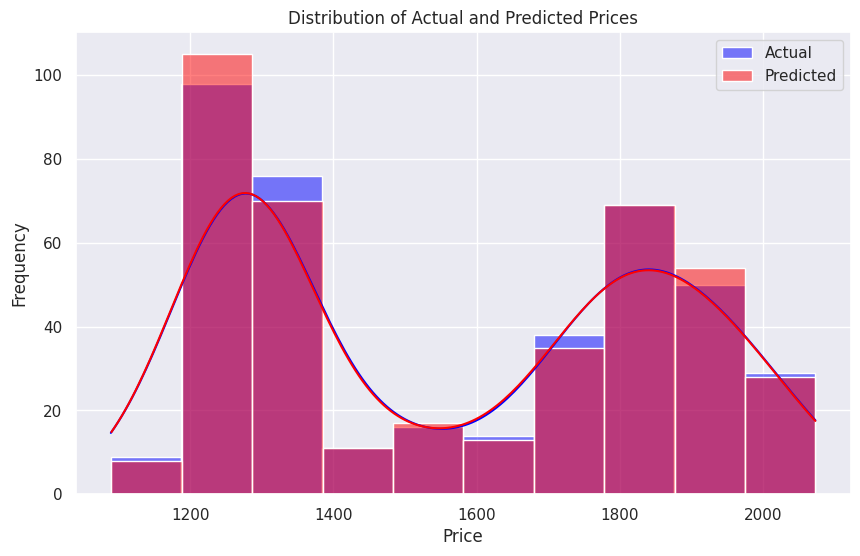

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(y_pred_test, color='red', label='Predicted', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Prices')
plt.legend()
plt.show()


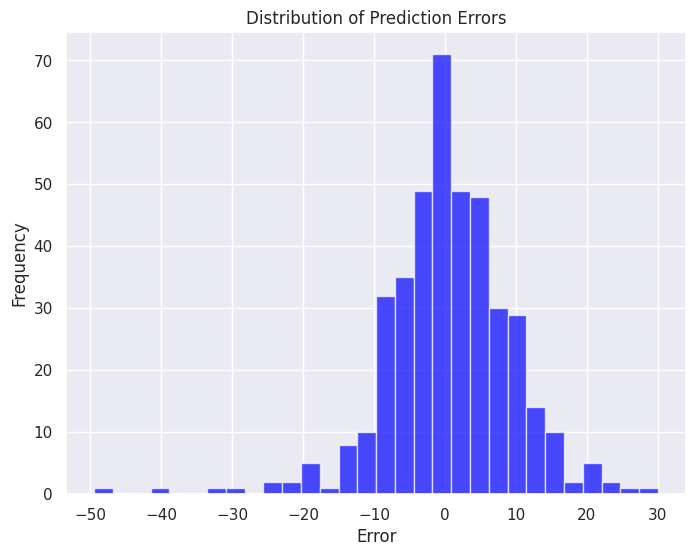

In [ ]:
# Menghitung kesalahan prediksi
errors = y_test - y_pred_test

# Plot distribusi kesalahan prediksi menggunakan plt.hist
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# **NYAMPE MARI**

# **Note cell dibawah tidak dianggap**

## **PREPROCESSING**

# **EVALUATION**

In [ ]:
# # Stastistikal Analisis
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
# mape = np.mean(np.abs((y_test - y_pred) / np.maximum(1, y_test))) * 100
# r2 = r2_score(y_test, y_pred)
# ave = np.var(y_pred / np.var(y_test))
# kappa_score = cohen_kappa_score(y_test, y_pred)

# # Print the Kappa score
# print("Cohen's Kappa Score:", kappa_score)
# print("R-squared (R2) Score:", r2)
# print("Mean Absolute Error:", mae)
# print("Root Mean Squared Error:", rmse)
# print("Mean Absolute Percentage Error:", mape)
# print("Mean Squared Error:", mse)
# print("Average Variance Extracted (AVE)", ave)

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)

In [ ]:
# # prompt: berikan kode untuk visualisasinya pastikan kode berjalan dengan baik untuk visualisasi prediksi

# import matplotlib.pyplot as plt

# # Plot the actual and predicted values
# plt.plot(y_test, color='blue', label='Actual')
# plt.plot(y_pred, color='orange', label='Predicted')

# # Add labels and title
# plt.title('Actual vs Predicted')
# plt.xlabel('Data Points')
# plt.ylabel('Value')

# # Add legend and show plot
# plt.legend()
# plt.show()


In [ ]:
# # Create a date range for future predictions (1 year ahead)
# future_predictions = pd.date_range(start=df['Date'].max(), periods=365, freq='D')

# # Create a dataframe for future predictions
# future_data = pd.DataFrame({
#     'Date': future_predictions,
#     'Day': future_predictions.day,
#     'Month': future_predictions.month,
#     'Year': future_predictions.year
# })

# # Assuming average values for the numeric columns for future predictions
# avg_values = df.mean()
# future_data['Open'] = avg_values['Open']  # Add the 'Open' column with the average value
# future_data['High'] = avg_values['High']
# future_data['Low'] = avg_values['Low']
# future_data['Vol.'] = avg_values['Vol.']
# future_data['Change %'] = avg_values['Change %']

# # Scaling future data
# future_X = future_data[['Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month', 'Year']]
# #future_X = sc.fit_transform(future_X)  # Use transform instead of fit_transform

# # Predicting future prices
# future_predictions = best_gbr.predict(future_X)
# future_predictions_transformed = label.inverse_transform(future_predictions)

# # Create a new column in future_df for predicted prices
# future_data['Predicted_Price'] = future_predictions_transformed

# # Generate confidence intervals (adjust based on your model's output)
# future_data['Upper_Bound'] = future_data['Predicted_Price'] + 1000
# future_data['Lower_Bound'] = future_data['Predicted_Price'] - 1000

In [ ]:
# # Visualization
# fig = go.Figure()

# # Historical data
# fig.add_trace(go.Scatter(x=df['Date'], y=df['Price'], mode='lines', name='Historical Data', line=dict(color='blue')))

# # Predicted data
# fig.add_trace(go.Scatter(x=future_df['Date'], y=future_df['Predicted_Price'], mode='lines', name='Predicted Data', line=dict(color='red')))

# # Confidence interval
# fig.add_trace(go.Scatter(
#     x=future_df['Date'].tolist() + future_df['Date'][::-1].tolist(),
#     y=future_df['Upper_Bound'].tolist() + future_df['Lower_Bound'][::-1].tolist(),
#     fill='toself',
#     fillcolor='rgba(255, 165, 0, 0.2)',
#     line=dict(color='rgba(255, 255, 255, 0)'),
#     hoverinfo="skip",
#     showlegend=False,
#     name='Confidence Interval'
# ))

# # Update layout
# fig.update_layout(
#     title='Gold Price Prediction',
#     xaxis_title='Trading days',
#     yaxis_title='Value (€)',
#     legend=dict(x=0, y=1)
# )

# fig.show()